<a href="https://colab.research.google.com/github/mikhailstasyuk/dls-mipt/blob/main/%5Bhomework_4_2_%5Dgame_of_thrones_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

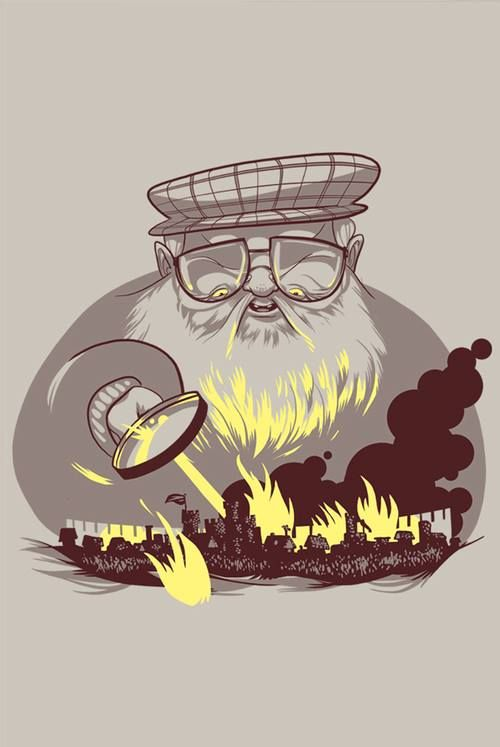

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [315]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 75.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 6.34MB/s]


In [316]:
!mkdir -p data/
!mv game_of_thrones_test.csv data/
!mv game_of_thrones_train.csv data/

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [317]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ROOT_DIR = pathlib.Path().absolute()
DATA_DIR = ROOT_DIR/'data'

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [318]:
df = pd.read_csv(DATA_DIR/"game_of_thrones_train.csv", index_col="S.No")
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [319]:
df[['culture']].value_counts()

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

##### Визуализируем пропуски

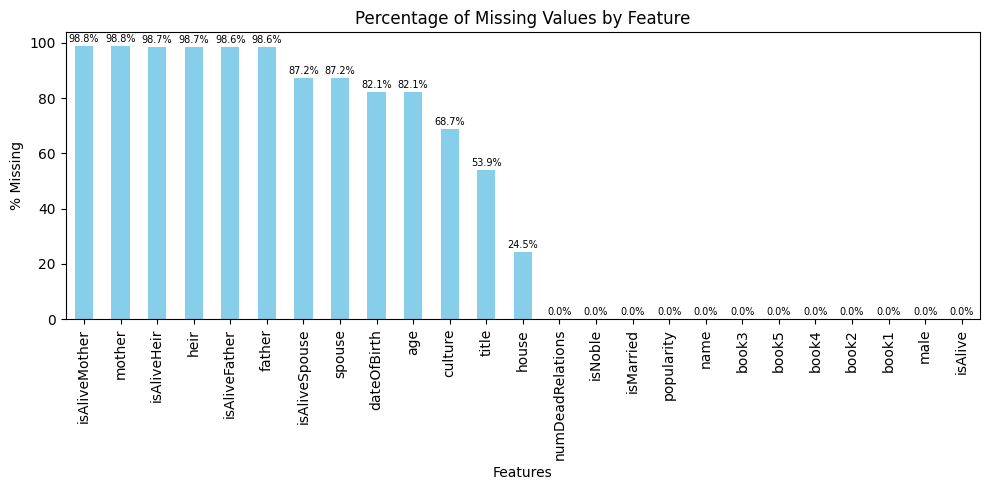

In [320]:
def plot_missing_cols(df):
    """
    Plots the percentage of missing values for each column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    pd.DataFrame: A DataFrame containing the percentage of missing values for each column.
    """
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

    missing_value_df = missing_value_df.sort_values(by='percent_missing', ascending=False)

    ax = missing_value_df.plot(kind='bar', figsize=(10, 5), legend=False, color='skyblue')
    ax.set_title('Percentage of Missing Values by Feature')
    ax.set_xlabel('Features')
    ax.set_ylabel('% Missing')
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=7, color='black',
                    xytext=(0, 5), textcoords='offset points')
    return missing_value_df

missing_value_df = plot_missing_cols(df)

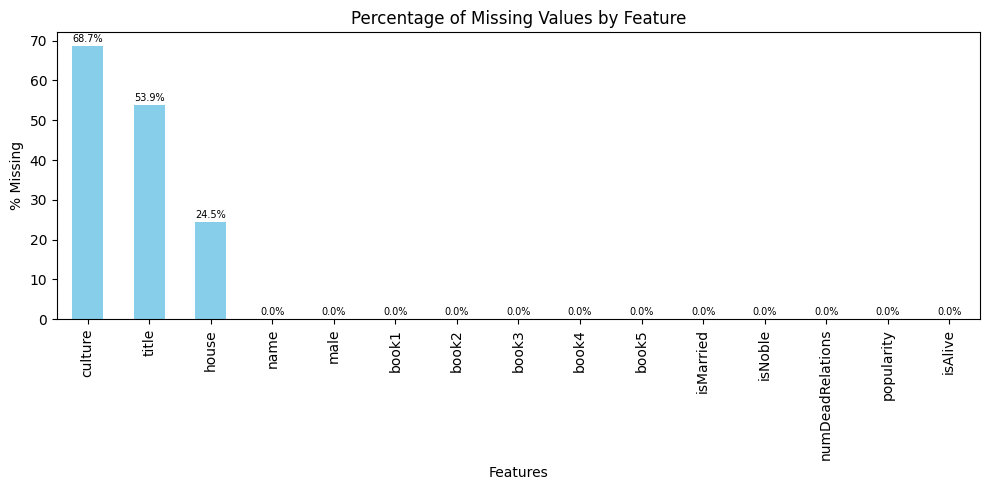

In [321]:
THRESHOLD = 70
cols_to_drop = missing_value_df[missing_value_df.percent_missing > THRESHOLD].index.tolist()
df_no_empty_cols = df.drop(columns=cols_to_drop)
_ = plot_missing_cols(df_no_empty_cols)

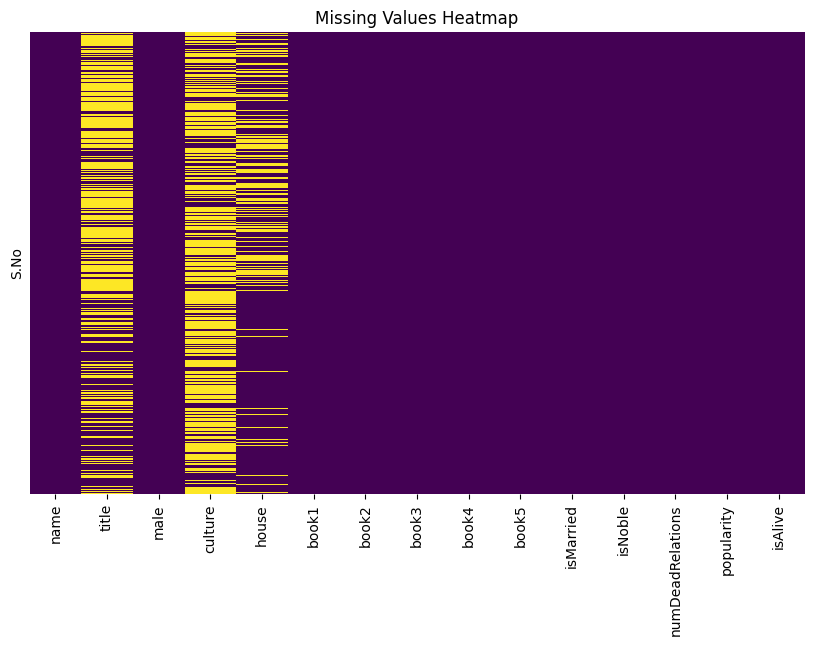

In [322]:
# Create a mask of missing values
missing_mask = df_no_empty_cols.isna()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust size as needed
sns.heatmap(missing_mask, cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

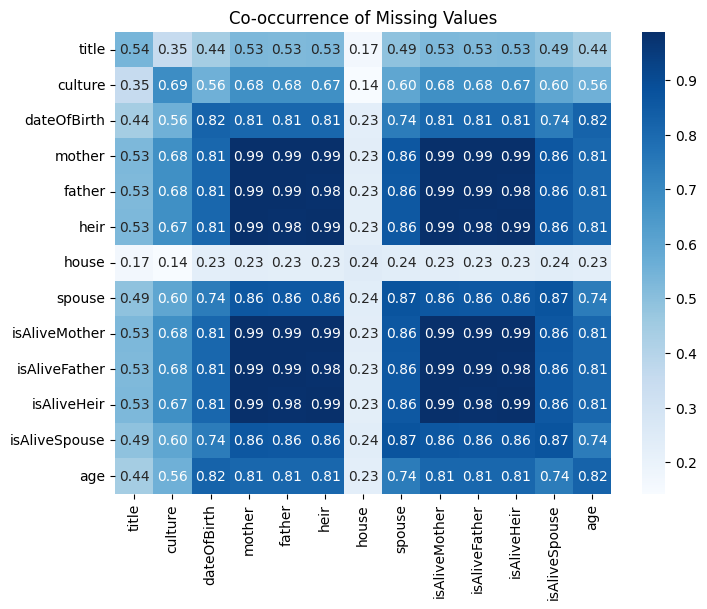

In [323]:
missing_counts = df.isna().sum()
missing_cols = missing_counts[missing_counts > 0].index.tolist()
missing_mask = df[missing_cols].isna().astype(int)

co_occurrence = missing_mask.T.dot(missing_mask)

co_occurrence_normalized = co_occurrence / len(df)

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_normalized, annot=True, cmap="Blues", cbar=True, fmt=".2f")
plt.title("Co-occurrence of Missing Values")
plt.show()

### Заполнение пропусков


##### Упрощаем признак culture

In [324]:
cult = {
    'summer islands': ['summer islands', 'summer islander', 'summer isles'],
    'ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'asshai': ["asshai'i", 'asshai'],
    'lysene': ['lysene', 'lyseni'],
    'andal': ['andal', 'andals'],
    'braavosi': ['braavosi', 'braavos'],
    'dornish': ['dornishmen', 'dorne', 'dornish'],
    'myrish': ['myr', 'myrish', 'myrmen'],
    'westermen': ['westermen', 'westerman', 'westerlands'],
    'westerosi': ['westeros', 'westerosi'],
    'stormlander': ['stormlands', 'stormlander'],
    'norvoshi': ['norvos', 'norvoshi'],
    'northmen': ['the north', 'northmen'],
    'free folk': ['wildling', 'first men', 'free folk'],
    'qartheen': ['qartheen', 'qarth'],
    'reach': ['the reach', 'reach', 'reachmen'],
}

cult_mapping = {}

for cult_key, cult_names in cult.items():
    for cult_name in cult_names:
        cult_mapping[cult_name] = cult_key

In [325]:
df_cult_simplified = df_no_empty_cols.copy()

df_cult_simplified['culture'] = df_cult_simplified.culture.str.lower().apply(lambda cult_name: cult_mapping.get(cult_name, cult_name))

##### Заполняем признак house

In [326]:
# Персонажи Free Folk не имеют признака House по намерению автора,
# а не случайным образом, поэтому мы можем заполнить пропуски,
# присвоив им категорию independent
mask = (df_cult_simplified.culture == 'free folk') & (df_cult_simplified.house.isna())
df_cult_simplified.loc[mask, 'house'] = 'Independent'
# df_cult_simplified[df_cult_simplified.culture == 'free folk']

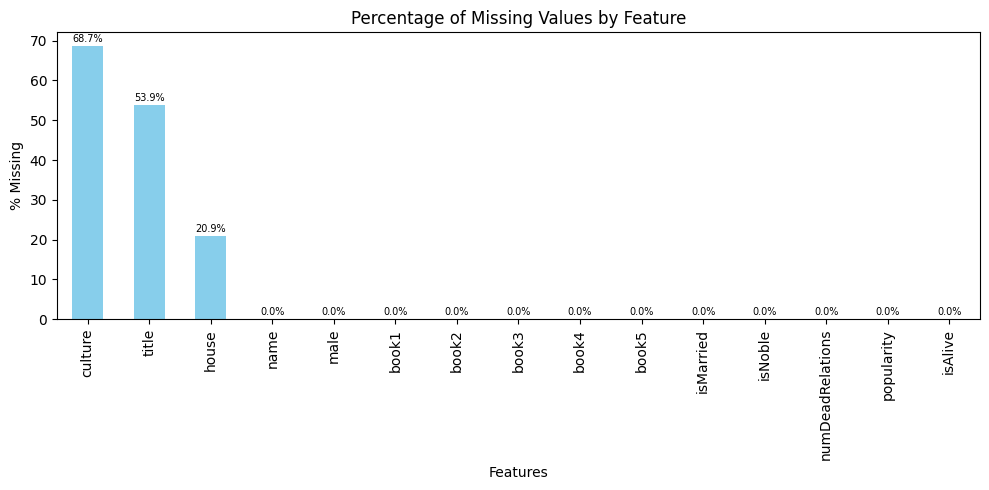

In [327]:
_ = plot_missing_cols(df_cult_simplified)

##### Соответствие родов и их оверлордов

In [328]:
house = {
  "independent": "independent",
  "house frey": "house tully",
  "house swyft": "house lannister",
  "house arryn": "house arryn",
  "house santagar": "house martell",
  "house targaryen": "house targaryen",
  "house osgrey": "house tully",
  "night's watch": "independent",
  "house humble": "house greyjoy",
  "house wylde": "house tully",
  "house wode": "house tully",
  "house fell": "house stark",
  "brotherhood without banners": "independent",
  "house webber": "house tully",
  "house greyjoy": "house greyjoy",
  "house stark": "house stark",
  "house waynwood": "house arryn",
  "house dayne": "house martell",
  "house manderly": "house stark",
  "house farwynd of the lonely light": "house greyjoy",
  "happy port": "independent",
  "house of loraq": "independent",
  "kingswood brotherhood": "independent",
  "house botley": "house greyjoy",
  "burned men": "independent",
  "house velaryon": "house targaryen",
  "house tallhart": "house stark",
  "house tyrell": "house tyrell",
  "house blackwood": "house tully",
  "house blackfyre": "house targaryen",
  "wildling": "independent",
  "kingdom of the three daughters": "independent",
  "house royce of the gates of the moon": "house arryn",
  "house nayland": "house tully",
  "house vance of wayfarer's rest": "house tully",
  "house rowan": "house tyrell",
  "house farrow": "house tully",
  "house lonmouth": "house greyjoy",
  "house reyne": "house lannister",
  "house ashford": "house tyrell",
  "house brax": "house tyrell",
  "house paege": "house tully",
  "house hollard": "house lannister",
  "house tarth": "house baratheon",
  "house ryswell": "house stark",
  "house lannister": "house lannister",
  "house crakehall": "house lannister",
  "house darklyn": "house lannister",
  "house westerling": "house lannister",
  "house weaver": "house tully",
  "house connington": "house targaryen",
  "house stout": "house stark",
  "house harclay": "house stark",
  "house drumm": "house greyjoy",
  "house lannister of lannisport": "house lannister",
  "house crabb": "house lannister",
  "drowned men": "independent",
  "stormcrows": "independent",
  "antler men": "independent",
  "house spicer": "house lannister",
  "house staunton": "house lannister",
  "house stonetree": "house stark",
  "house leygood": "house tyrell",
  "house bolton": "house stark",
  "house sparr": "house tyrell",
  "house fossoway of cider hall": "house tyrell",
  "house varner": "house tyrell",
  "house tarly": "house baratheon",
  "peach": "independent",
  "house lynderly": "house arryn",
  "house ironmaker": "house greyjoy",
  "house martell": "house martell",
  "house clegane": "house lannister",
  "house costayne": "house martell",
  "house heddle": "house stark",
  "stone crows": "independent",
  "house ryger": "house targaryen",
  "sea watch": "independent",
  "second sons": "independent",
  "moon brothers": "independent",
  "house baelish": "independent",
  "faceless men": "independent",
  "brave companions": "independent",
  "house frey of riverrun": "house tully",
  "house stokeworth": "house lannister",
  "house hightower": "house tyrell",
  "band of nine": "independent",
  "house oakheart": "house tyrell",
  "house sharp": "house tyrell",
  "house hunt": "house tyrell",
  "house bracken": "house tully",
  "house whent": "house tully",
  "house dalt": "house martell",
  "house charlton": "house tyrell",
  "house butterwell": "house tully",
  "house qorgyle": "house martell",
  "house ambrose": "house tully",
  "alchemists' guild": "independent",
  "house bushy": "house tully",
  "house blacktyde": "house greyjoy",
  "house beesbury": "house tyrell",
  "house baratheon": "house baratheon",
  "house bulwer": "house lannister",
  "house cafferen": "house baratheon",
  "house smallwood": "house stark",
  "house payne": "house lannister",
  "house buckler": "house baratheon",
  "house tully": "house tully",
  "black ears": "independent",
  "house caswell": "house baratheon",
  "house conklyn": "house tully",
  "house greenhill": "house tyrell",
  "house karstark": "house stark",
  "house redfort": "house arryn",
  "house baratheon of dragonstone": "house baratheon",
  "house deddings": "house tully",
  "house slynt": "house baratheon",
  "house plumm": "house baratheon",
  "house redwyne": "house tyrell",
  "house manwoody": "house martell",
  "house harlaw": "house greyjoy",
  "house risley": "house tully",
  "faith of the seven": "independent",
  "pureborn": "independent",
  "house codd": "house stark",
  "house willum": "house tully",
  "house of galare": "independent",
  "r'hllor": "independent",
  "house morrigen": "house stark",
  "house corbray": "house arryn",
  "house gaunt": "house tully",
  "house goodbrother": "house greyjoy",
  "kingsguard": "independent",
  "house grafton": "house arryn",
  "house hornwood": "house stark",
  "house grandison": "house lannister",
  "house sawyer": "house lannister",
  "house uffering": "house lannister",
  "house bolling": "house lannister",
  "house clifton": "house tully",
  "house blackberry": "house lannister",
  "chataya's brothel": "independent",
  "house norcross": "house tully",
  "house mallister": "house stark",
  "house fossoway of new barrel": "house tyrell",
  "house swann": "house tyrell",
  "house cupps": "house tully",
  "house penny": "house tully",
  "house penrose": "house baratheon",
  "house umber": "house stark",
  "house vance of atranta": "house tully",
  "house royce": "house arryn",
  "house tawney": "house tyrell",
  "windblown": "independent",
  "house piper": "house tully",
  "house serry": "house tully",
  "house lorch": "house lannister",
  "house lefford": "house lannister",
  "house strong": "house targaryen",
  "house roote": "house stark",
  "house hardy": "house stark",
  "queensguard": "independent",
  "house meadows": "house tully",
  "house dondarrion": "house baratheon",
  "house lothston": "house stark",
  "house yew": "house tully",
  "house mullendore": "house tully",
  "house florent": "house tyrell",
  "house mertyns": "house tyrell",
  "house boggs": "house stark",
  "house woods": "house stark",
  "house inchfield": "house tyrell",
  "house blackmont": "house martell",
  "house pemford": "house tully",
  "house kenning of harlaw": "house greyjoy",
  "house shepherd": "house tyrell",
  "house estermont": "house baratheon",
  "house wynch": "house tully",
  "house staedmon": "house tully",
  "house seaworth": "independent",
  "city watch of king's landing": "independent",
  "house cockshaw": "house lannister",
  "house graceford": "house tyrell",
  "house stackspear": "house lannister",
  "house haigh": "house lannister",
  "house jast": "house tyrell",
  "house farring": "house tyrell",
  "house celtigar": "house targaryen",
  "house of ghazeen": "independent",
  "house byrch": "house stark",
  "house hawick": "house tully",
  "house belmore": "house tyrell",
  "house broom": "house tully",
  "house brune of brownhollow": "house stark",
  "house cassel": "house stark",
  "house rosby": "house baratheon",
  "house harlaw of harridan hill": "house greyjoy",
  "house cuy": "house tully",
  "house caron": "house martell",
  "house cerwyn": "house stark",
  "house vaith": "house tyrell",
  "house vance": "house tully",
  "house shett of gull tower": "house stark",
  "house vypren": "house tyrell",
  "house marbrand": "house lannister",
  "house hardyng": "house tully",
  "house allyrion": "house martell",
  "house locke": "house stark",
  "house bar emmon": "house baratheon",
  "house mooton": "house baratheon",
  "house norridge": "house tully",
  "house hunter": "house stark",
  "house hayford": "house baratheon",
  "house glover": "house stark",
  "house brune of the dyre den": "house stark",
  "house prester": "house tully",
  "house fowler": "house tully",
  "house goodbrook": "house tully",
  "house greenfield": "house tyrell",
  "house gower": "house tyrell",
  "blacks": "house targaryen",
  "house hewett": "house tully",
  "house borrell": "house greyjoy",
  "house peake": "house tyrell",
  "citadel": "independent",
  "wise masters": "independent",
  "good masters": "independent",
  "house sunglass": "house tully",
  "house grimm": "house tully",
  "the citadel": "independent",
  "house mollen": "house tyrell",
  "house hoare": "house greyjoy",
  "house rambton": "house tully",
  "house harlaw of the tower of glimmering": "house greyjoy",
  "house wull": "house stark",
  "house wagstaff": "house stark",
  "house vyrwel": "house tully",
  "house darry": "house tully",
  "house lydden": "house tully",
  "house bettley": "house tully",
  "house myre": "house tully",
  "house mormont": "house stark",
  "house reed": "house stark",
  "house kenning of kayce": "house greyjoy",
  "house of pahl": "independent",
  "house turnberry": "house tyrell",
  "house blackbar": "house greyjoy",
  "house woolfield": "house tully",
  "house fossoway": "house tyrell",
  "house mallery": "house tully",
  "house chyttering": "house baratheon",
  "house flint of widow's watch": "house stark",
  "house lychester": "independent",
  "house vikary": "house targaryen",
  "house selmy": "house baratheon",
  "house volmark": "house greyjoy",
  "house merlyn": "independent",
  "house crane": "house targaryen",
  "house sarsfield": "house lannister",
  "house of merreq": "independent",
  "house chester": "independent",
  "house jordayne": "house martell",
  "iron bank of braavos": "independent",
  "house goodbrother of shatterstone": "house greyjoy",
  "house toland": "house targaryen",
  "house baratheon": "house baratheon",
  "house yronwood": "house martell",
  "house kettleblack": "house baratheon",
  "house wythers": "independent",
  "house norrey": "house stark",
  "house foote": "house baratheon",
  "house chelsted": "independent",
  "house banefort": "house lannister",
  "house ball": "house targaryen",
  "house cox": "house targaryen",
  "house ruttiger": "independent",
  "house estren": "independent",
  "house rykker": "house baratheon",
  "house longwaters": "house targaryen",
  "house thorne": "house stark",
  "house moreland": "independent",
  "house flint": "house stark",
  "house hogg": "independent",
  "house longthorpe": "independent",
  "house coldwater": "house targaryen",
  "house leek": "independent",
  "house farman": "house lannister",
  "house harlaw of harlaw hall": "house greyjoy",
  "house templeton": "independent",
  "house wells": "independent",
  "house toyne": "house targaryen",
  "house liddle": "house lannister",
  "house gargalen": "house martell",
  "house mudd": "independent",
  "house farwynd": "house greyjoy",
  "house sunderland": "house greyjoy",
  "house hetherspoon": "independent",
  "house uller": "house martell",
  "house wayn": "independent",
  "house tollett": "independent",
  "house poole": "independent",
  "maesters": "independent",
  "house blanetree": "independent",
  "house blount": "house baratheon",
  "golden company": "house targaryen",
  "company of the cat": "independent",
  "house suggs": "independent",
  "khal": "independent",
  "house nymeros martell": "house martell",
  "house drinkwater": "independent",
  "house harlaw of grey garden": "house greyjoy",
  "summer islands": "independent",
  "house condon": "independent",
  "house lannister": "house lannister",
  "house moore": "independent"
}

##### Создаем признак great_house и заполняем пропуски в нем

In [329]:
import numpy as np

df_new_greathouse = df_cult_simplified.copy()

df_new_greathouse['great_house'] = df_new_greathouse.house.str.lower().apply(lambda house_name: house.get(house_name, np.nan))
df_new_greathouse.great_house.value_counts()
df_new_greathouse.columns

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'popularity', 'isAlive', 'great_house'],
      dtype='object')

###### Построим модель для заполнения пропусков в признаке great_house

In [358]:
mask = (df_new_greathouse.great_house.isna() == False) & (df_new_greathouse.culture.isna() == False)
df_greathouse_cult_nona = df_new_greathouse[mask]
msg = "Количество объектов с заполненными признаками great_house и culture:"
print(msg, len(df_greathouse_cult_nona))
print("Эти объекты обладают информацией, подходящей для заполнения пропусков в great_house.")

Количество объектов с заполненными признаками great_house и culture: 383
Эти объекты обладают информацией, подходящей для заполнения пропусков в great_house.


In [359]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Удалим ненужные признаки
df_greathouse_cult_clean = df_greathouse_cult_nona.drop(
    columns=["name", "title", "house", "isAlive"]).reset_index(drop=True)

print(df_greathouse_cult_clean.columns)
# Закодируем категоральный признак culture и заменим его на получившиеся dummies
enc = OneHotEncoder()
encoded = enc.fit_transform(df_greathouse_cult_clean.culture.to_frame())

known_categories = enc.categories_[0]
culture_dummies = pd.DataFrame(encoded.toarray().astype(int), columns=known_categories)

df_greathouse_cult_encoded = df_greathouse_cult_clean.copy().drop(columns=["culture"])
df_greathouse_cult_encoded = pd.concat((df_greathouse_cult_encoded, culture_dummies), axis=1)
# df_greathouse_cult_encoded

# Разделим выборку на признаки и таргеты (целевая переменная culture текстовая,
# поэтому закодируем ее, используя LabelEncoder)
label_encoder = LabelEncoder()

X = df_greathouse_cult_encoded.drop(columns=["great_house"])
y = df_greathouse_cult_encoded.great_house
y_encoded = label_encoder.fit_transform(y)
# y_encoded

# Разделим выборку на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, random_state=1, shuffle=True, stratify=y, test_size=0.2)

print("Числок строк в обучающей части:", len(X_train))
print("Числок строк в тестовой части:", len(X_test))

Index(['male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'popularity',
       'great_house'],
      dtype='object')
Числок строк в обучающей части: 306
Числок строк в тестовой части: 77


In [360]:
# Обучим классификаторы и выберем лучший
classifier_grid = {
    "LogisticRegression": (
        LogisticRegression(),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
        }
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [None, 10, 20],
            'classifier__criterion': ['gini', 'entropy']
        }
    ),
}

results = {}
for name, (classifier, params) in classifier_grid.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    print(f"Обучаю {name}...")
    grid_search = GridSearchCV(
        estimator=pipe, param_grid=params, scoring='accuracy', cv=3, n_jobs=2
    )
    grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy
    }

# for clf_name, result in results.items():
    # print(f"{clf_name}:\n\tBest Params: {result['best_params']}\n\tAccuracy: {result['accuracy']:.4f}")

sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

best_model, best_info = sorted_results[0]
best_accuracy = best_info['accuracy']

print(f"\nЛучшая модель: {best_model}. Accuracy: {best_accuracy:.4f}")

print("\nМодели, отсортированные по точности:")
for name, info in sorted_results:
    print(f"{name}: Accuracy = {info['accuracy']:.4f}")

class_names = pd.DataFrame(label_encoder.classes_, columns=["Class"])
print("\nКлассы и соответствующие им номера:")
print(class_names)

Обучаю LogisticRegression...
Обучаю AdaBoostClassifier...
Обучаю RandomForestClassifier...
Обучаю GaussianProcessClassifier...
Обучаю GaussianNB...
Обучаю KNeighborsClassifier...
Обучаю SVC...
Обучаю DecisionTreeClassifier...

Лучшая модель: RandomForestClassifier. Accuracy: 0.8312

Модели, отсортированные по точности:
RandomForestClassifier: Accuracy = 0.8312
SVC: Accuracy = 0.8312
LogisticRegression: Accuracy = 0.8182
GaussianNB: Accuracy = 0.8182
GaussianProcessClassifier: Accuracy = 0.8052
KNeighborsClassifier: Accuracy = 0.8052
DecisionTreeClassifier: Accuracy = 0.7922
AdaBoostClassifier: Accuracy = 0.5065

Классы и соответствующие им номера:
             Class
0      house arryn
1  house baratheon
2    house greyjoy
3  house lannister
4    house martell
5      house stark
6  house targaryen
7      house tully
8     house tyrell
9      independent


In [333]:
# Теперь обучим лучший классификатор еще раз, а затем заполним часть пропусков
# признака great_house.

best_params = results[best_model]['best_params']
clf = classifier_grid[best_model][0]  # The classifier object

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

pipe.set_params(**best_params)
pipe.fit(X, y_encoded)

mask = (df_new_greathouse.great_house.isna() == True) & \
       (df_new_greathouse.culture.isna() == False) & \
       (df_new_greathouse.culture.isin(known_categories)) # выбираем только известные классификатору категории

df_greathouse_nan = df_new_greathouse[mask]
print(df_greathouse_nan.columns)

# Снова удаляем ненужные признаки и кодируем признак culture
dummies = enc.transform(df_greathouse_nan.culture.to_frame())
culture_encoded = pd.DataFrame(dummies.toarray().astype(int), columns=enc.categories_[0])
df_greathouse_nan_encoded = df_greathouse_nan.copy().drop(columns=["name", "title", "house", "culture", "great_house", "isAlive"]).reset_index(drop=True)
df_greathouse_nan_encoded = pd.concat((df_greathouse_nan_encoded, culture_encoded), axis=1)
# df_greathouse_nan_encoded

# Заполним предсказаниями часть пропусков признака great_house
# в исходном наборе данных
df_new_greathouse_imputed = df_new_greathouse.copy().drop(columns=['house'])
y_pred = pipe.predict(df_greathouse_nan_encoded)
pred_class_to_names = class_names.Class.loc[y_pred].to_numpy()
df_new_greathouse_imputed.loc[df_new_greathouse[mask].index, "great_house"] = pred_class_to_names
df_new_greathouse_imputed.great_house.value_counts()
df_new_greathouse_imputed

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'popularity', 'isAlive', 'great_house'],
      dtype='object')


,name,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,great_house
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,0,0,0,0,0,0,0,11,0.605351,0,NaN
2,Walder Frey,Lord of the Crossing,1,rivermen,1,1,1,1,1,1,1,1,0.896321,1,house tully
3,Addison Hill,Ser,1,NaN,0,0,0,1,0,0,1,0,0.267559,1,house lannister
4,Aemma Arryn,Queen,0,NaN,0,0,0,0,0,1,1,0,0.183946,0,house arryn
5,Sylva Santagar,Greenstone,0,dornish,0,0,0,1,0,1,1,0,0.043478,1,house martell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,1,0,1,1,0,0,1,0,0.160535,1,NaN
1554,Masha Heddle,NaN,0,NaN,1,1,0,0,0,0,0,0,0.040134,0,NaN
1555,Matthos Seaworth,NaN,1,NaN,0,1,1,1,1,0,0,0,0.076923,0,independent


In [334]:
# Можем восстановить еще несколько пропусков great_house, используя название culture
mask = (df_new_greathouse_imputed.great_house.isna()) & (df_new_greathouse_imputed.culture.isna() == False)
df_new_greathouse_imputed[mask]

,name,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,great_house
S.No,,,,,,,,,,,,,,,
150,Serra,NaN,0,lysene,0,0,0,0,1,1,0,0,0.016722,1,NaN
210,Tregar Ormollen,NaN,1,lysene,0,1,0,1,0,0,0,0,0.023411,1,NaN
271,Tobho Mott,NaN,1,qohor,1,1,1,1,1,0,0,0,0.083612,1,NaN
392,Byan Votyris,NaN,1,norvoshi,1,0,0,0,0,0,0,0,0.000000,1,NaN
500,Erreg,King,0,andal,0,0,1,0,0,0,1,0,0.016722,1,NaN
1027,Eroeh,NaN,0,lhazareen,1,1,0,0,1,0,0,0,0.033445,0,NaN
1103,Hugor of the Hill,King of the Andals,1,andal,0,0,0,0,1,0,1,0,0.050167,1,NaN
1255,Mysaria,Mistress of whisperers,0,lysene,0,0,0,0,0,0,1,0,0.013378,1,NaN
1269,Ordello,Magister of Pentos,0,pentoshi,0,0,0,0,1,0,1,0,0.013378,0,NaN


In [335]:
# Судя по всему, некоторые датапоинты - это представители независимых народов, поэтому присвоим им категорию independent
independent_cults = ["braavosi", "qartheen", "lysene", "tyroshi", "qohor","norvoshi", "pentoshi"]
mask = (df_new_greathouse_imputed.great_house.isna()) & (df_new_greathouse_imputed.culture.isin(independent_cults))
df_new_greathouse_imputed.loc[mask, "great_house"] = 'independent'

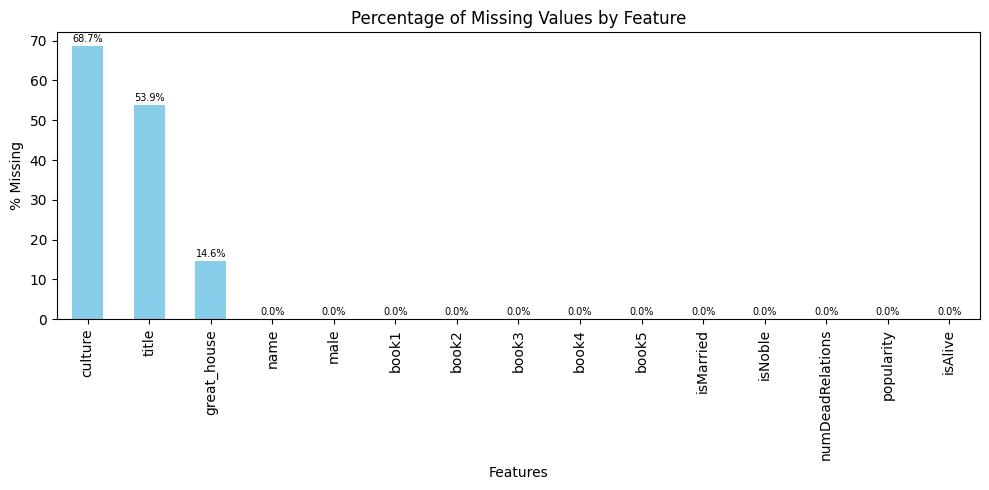

In [336]:
_ = plot_missing_cols(df_new_greathouse_imputed)

In [337]:
# Обучим еще одну модель и восстановим оставшиеся пропуски признака great_house.
# На этот раз мы не будем использовать признак culture
df_greathouse_imputed_nona = df_new_greathouse_imputed.drop(
    columns=["name", "title", "culture", "isAlive"]).reset_index(drop=True)
mask = (df_greathouse_imputed_nona.great_house.isna() == False)
df_greathouse_imputed_nona = df_greathouse_imputed_nona[mask]

# Разделим выборку на признаки и таргеты (целевая переменная culture текстовая,
# поэтому закодируем ее, используя LabelEncoder)
label_encoder = LabelEncoder()

X = df_greathouse_imputed_nona.drop(columns=["great_house"])
y = df_greathouse_imputed_nona.great_house
y_encoded = label_encoder.fit_transform(y)
# y_encoded

# Разделим выборку на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, random_state=1, shuffle=True, test_size=0.2)

print("Числок строк в обучающей части:", len(X_train))
print("Числок строк в тестовой части:", len(X_test))

# Обучим классификаторы и выберем лучший
classifier_grid = {
    "LogisticRegression": (
        LogisticRegression(),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
        }
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [None, 10, 20],
            'classifier__criterion': ['gini', 'entropy']
        }
    ),
}

results = {}
for name, (classifier, params) in classifier_grid.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    print(f"Обучаю {name}...")
    grid_search = GridSearchCV(
        estimator=pipe, param_grid=params, scoring='accuracy', cv=3, n_jobs=2
    )
    grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy
    }

# for clf_name, result in results.items():
    # print(f"{clf_name}:\n\tBest Params: {result['best_params']}\n\tAccuracy: {result['accuracy']:.4f}")

sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

best_model, best_info = sorted_results[0]
best_accuracy = best_info['accuracy']

print(f"\nЛучшая модель: {best_model}. Accuracy: {best_accuracy:.4f}")

print("\nМодели, отсортированные по точности:")
for name, info in sorted_results:
    print(f"{name}: Accuracy = {info['accuracy']:.4f}")

class_names = pd.DataFrame(label_encoder.classes_, columns=["Class"])
print("\nКлассы и соответствующие им номера:")
print(class_names)

Числок строк в обучающей части: 1064
Числок строк в тестовой части: 266
Обучаю LogisticRegression...
Обучаю AdaBoostClassifier...
Обучаю RandomForestClassifier...
Обучаю GaussianProcessClassifier...
Обучаю GaussianNB...
Обучаю KNeighborsClassifier...
Обучаю SVC...
Обучаю DecisionTreeClassifier...

Лучшая модель: SVC. Accuracy: 0.3947

Модели, отсортированные по точности:
SVC: Accuracy = 0.3947
RandomForestClassifier: Accuracy = 0.3910
GaussianProcessClassifier: Accuracy = 0.3872
KNeighborsClassifier: Accuracy = 0.3722
LogisticRegression: Accuracy = 0.3684
AdaBoostClassifier: Accuracy = 0.3571
DecisionTreeClassifier: Accuracy = 0.3195
GaussianNB: Accuracy = 0.0489

Классы и соответствующие им номера:
             Class
0      house arryn
1  house baratheon
2    house greyjoy
3  house lannister
4    house martell
5      house stark
6  house targaryen
7      house tully
8     house tyrell
9      independent


In [338]:
best_params = results[best_model]['best_params']
clf = classifier_grid[best_model][0]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

pipe.set_params(**best_params)
pipe.fit(X, y_encoded)

mask = df_new_greathouse_imputed.great_house.isna()
df_greathouse_imputed_final = df_new_greathouse_imputed[mask].drop(
    columns=["great_house", "name", "title", "culture", "isAlive"])
print(df_greathouse_imputed_final)

# # Заполним предсказаниями оставшуюся часть пропусков признака great_house
y_pred = pipe.predict(df_greathouse_imputed_final)
pred_class_to_names = class_names.Class.loc[y_pred].to_numpy()
# pred_class_to_names
df_greathouse_imputed = df_new_greathouse.copy()
df_greathouse_imputed.loc[df_new_greathouse[mask].index, "great_house"] = pred_class_to_names
df_greathouse_imputed.great_house.value_counts()

      male  book1  book2  book3  book4  book5  isMarried  isNoble  \
S.No                                                                
1        1      0      0      0      0      0          0        0   
6        1      0      0      0      0      0          0        0   
8        1      0      0      0      0      0          0        0   
9        1      0      0      1      0      0          0        1   
12       0      0      0      0      1      0          0        0   
...    ...    ...    ...    ...    ...    ...        ...      ...   
1537     1      1      1      1      1      1          1        1   
1547     1      0      0      1      1      1          0        0   
1551     1      1      1      1      1      0          0        0   
1553     1      1      0      1      1      0          0        1   
1554     0      1      1      0      0      0          0        0   

      numDeadRelations  popularity  
S.No                                
1                   11    0.

,count
great_house,
independent,364
house tully,309
house stark,174
house lannister,140
house tyrell,133
house greyjoy,103
house targaryen,82
house baratheon,59
house martell,48


In [339]:
independent_cults = ["braavosi", "qartheen", "lysene", "tyroshi", "qohor","norvoshi", "pentoshi"]
mask = (df_greathouse_imputed.great_house.isna()) & (df_greathouse_imputed.culture.isin(independent_cults))
df_greathouse_imputed[mask].culture.value_counts()

,count
culture,
braavosi,35
qartheen,4
lysene,3
tyroshi,2
qohor,1
norvoshi,1
pentoshi,1


In [340]:
# Судя по всему, некоторые датапоинты - это представители независимых народов, поэтому присвоим им категорию independent
df_greathouse_imputed.loc[mask, "great_house"] = 'independent'

In [341]:
# Посмотрим на оставшиеся пропуски
mask = df_greathouse_imputed.great_house.isna()
df_greathouse_imputed[mask].culture.value_counts()

,count
culture,
ironborn,17
dothraki,11
northmen,8
ghiscari,7
summer islands,3
astapori,3
reach,2
valyrian,2
westerosi,1


In [342]:
# Заполним оставшиеся пропуски great_house модами
# по соответсвующим признакам culture
mode_values = df_greathouse_imputed.groupby('culture')['great_house'].agg(lambda x: x.mode()[0])
df_greathouse_imputed['great_house'] = df_greathouse_imputed.apply(lambda row: mode_values[row['culture']] if pd.isna(row['great_house']) else row['great_house'], axis=1)

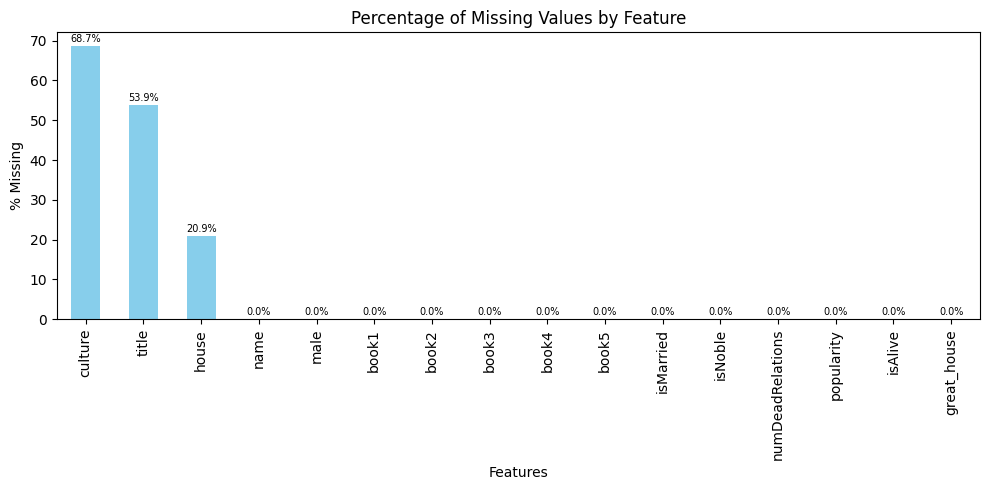

In [343]:
_ = plot_missing_cols(df_greathouse_imputed)

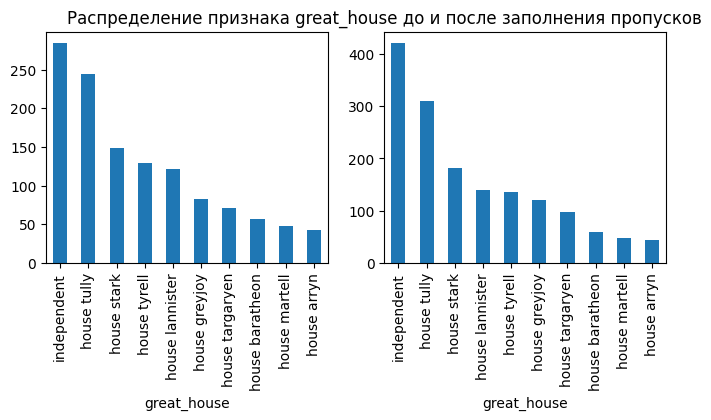

In [344]:
df_imputed = df_greathouse_imputed.drop(columns=["culture", "title", "name", "house"])
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
df_new_greathouse.great_house.value_counts().plot(kind="bar", ax=axs[0])
df_imputed.great_house.value_counts().plot(kind="bar", ax=axs[1]);
plt.title("Распределение признака great_house до и после заполнения пропусков", x=0.0)
plt.show()

In [345]:
df_imputed['age'] = df['age']
medians = df_imputed.groupby('great_house').agg('age').median()
df_imputed['age'] = df_imputed.apply(
    lambda row: medians[row['great_house']] if pd.isna(row['age']) else row['age'], axis=1
)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [346]:
df_imputed['isPopular'] = (df_imputed.popularity >= 0.18).astype(int)
df_imputed['boolDeadRelations'] = (df_imputed.numDeadRelations > 0).astype(int)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [347]:
enc = OneHotEncoder()

dummies = enc.fit_transform(df_imputed.great_house.to_frame())
dumframe = pd.DataFrame(dummies.toarray(), columns=enc.categories_[0])
df_encoded = pd.concat(
    (df_imputed.drop(columns=["great_house"]).reset_index(drop=True), dumframe), axis=1)
correlation_mat = df_encoded.corr()
print(correlation_mat["isAlive"].sort_values(ascending=False))

isAlive              1.000000
book4                0.284014
house tully          0.068507
house martell        0.059369
book5                0.032531
house tyrell         0.032497
house arryn          0.023856
book3                0.018427
house baratheon      0.016792
house greyjoy        0.015016
house lannister      0.000115
independent         -0.008674
house stark         -0.027303
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
book1               -0.112468
male                -0.148290
age                 -0.173822
boolDeadRelations   -0.178177
house targaryen     -0.186481
popularity          -0.194187
numDeadRelations    -0.198876
isPopular           -0.227026
Name: isAlive, dtype: float64


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

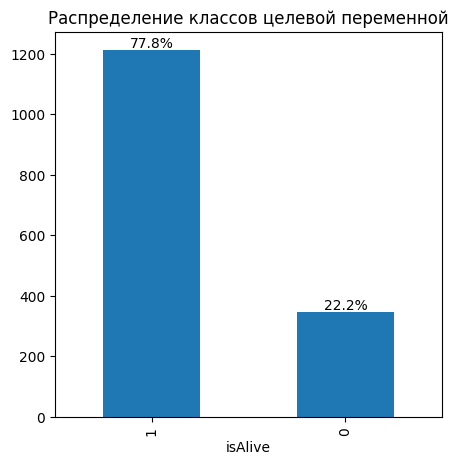

In [348]:
total_count = len(df_encoded)
alive_counts = df_encoded.isAlive.value_counts()
percentages = alive_counts.values / total_count * 100

plt.figure(figsize=(5, 5))
plt.title("Распределение классов целевой переменной")
ax = alive_counts.plot.bar(x='isAlive', y='count')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{pct:.1f}%' for pct in percentages])
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [349]:
df_encoded_new = df_encoded.copy()

df_encoded_new['popNotMarried'] = df_encoded_new.isPopular & (df_encoded_new.isMarried == False).astype(int)
df_encoded_new['popNotNoble'] = df_encoded_new.isPopular & (df_encoded_new.isNoble == False).astype(int)
df_encoded_new['marriedNotNoble'] = df_encoded_new.isMarried & (df_encoded_new.isNoble == False).astype(int)
df_encoded_new['nobleMale'] = (df_encoded_new.male & df_encoded_new.isNoble).astype(int)
df_encoded_new['marriedMale'] = (df_encoded_new.isMarried & df_encoded_new.male).astype(int)
df_encoded_new['marriedDeadRel'] = (df_encoded_new.isMarried & df_encoded_new.boolDeadRelations).astype(int)

df_encoded_new['book1Unpop'] = (df_encoded_new.book1 & df_encoded_new.isPopular == False).astype(int)

df_encoded_new['lowDeadRelations'] = (df_encoded_new.numDeadRelations >= 1) & (df_encoded_new.numDeadRelations < 3)
df_encoded_new['highDeadRelations'] = (df_encoded_new.numDeadRelations >= 3)
df_encoded_new['popHighDeadRelations'] = (df_encoded_new.isPopular & df_encoded_new.highDeadRelations).astype(int)
df_encoded_new['popDeadRelationsRate'] = (df_encoded_new.numDeadRelations * df_encoded_new.popularity)
df_encoded_new['targaryenPop'] = ((df_encoded_new.isPopular) & (df_encoded_new['house targaryen'] == True)).astype(int)

df_encoded_new['noBooks'] = (df_encoded_new[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1) == 0).astype(int)
df_encoded_new['firstBooksOnly'] = (df_encoded_new['book1'] & df_encoded_new['book2'] & (df_encoded_new['book3'] == True) & (df_encoded_new['book4'] == False) & (df_encoded_new['book5'] == False)).astype(int)
df_encoded_new['lastBooksOnly'] = (df_encoded_new['book1'] == False) & (df_encoded_new['book2'] == False) & (df_encoded_new['book3'] == False) & df_encoded_new['book4'] & df_encoded_new['book5']

# df_encoded_new.drop(columns=['boolDeadRelations', 'age', 'popularity'], inplace=True)
# df_encoded_new.drop(columns=['boolDeadRelations'], inplace=True)
df_encoded_new

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,marriedDeadRel,book1Unpop,lowDeadRelations,highDeadRelations,popHighDeadRelations,popDeadRelationsRate,targaryenPop,noBooks,firstBooksOnly,lastBooksOnly
0,1,0,0,0,0,0,0,0,11,0.605351,...,0,1,False,True,1,6.658863,1,1,0,False
1,1,1,1,1,1,1,1,1,1,0.896321,...,1,0,True,False,0,0.896321,0,0,0,False
2,1,0,0,0,1,0,0,1,0,0.267559,...,0,1,False,False,0,0.000000,0,0,0,False
3,0,0,0,0,0,0,1,1,0,0.183946,...,0,1,False,False,0,0.000000,0,1,0,False
4,0,0,0,0,1,0,1,1,0,0.043478,...,0,1,False,False,0,0.000000,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,1,1,0,1,1,0,0,1,0,0.160535,...,0,1,False,False,0,0.000000,0,0,0,False
1553,0,1,1,0,0,0,0,0,0,0.040134,...,0,1,False,False,0,0.000000,0,0,0,False
1554,1,0,1,1,1,1,0,0,0,0.076923,...,0,1,False,False,0,0.000000,0,0,0,False
1555,0,0,1,1,1,1,0,0,0,0.270903,...,0,1,False,False,0,0.000000,0,0,0,False


In [350]:
correlation_mat = df_encoded_new.corr()
print(correlation_mat["isAlive"].sort_values(ascending=False))

isAlive                 1.000000
book4                   0.284014
lastBooksOnly           0.109138
marriedNotNoble         0.087078
house tully             0.068507
house martell           0.059369
book1Unpop              0.054715
book5                   0.032531
house tyrell            0.032497
house arryn             0.023856
book3                   0.018427
house baratheon         0.016792
house greyjoy           0.015016
house lannister         0.000115
independent            -0.008674
house stark            -0.027303
lowDeadRelations       -0.032535
isMarried              -0.049381
book2                  -0.055998
isNoble                -0.060572
marriedMale            -0.079029
marriedDeadRel         -0.093966
nobleMale              -0.095827
book1                  -0.112468
firstBooksOnly         -0.113068
popDeadRelationsRate   -0.140004
male                   -0.148290
popNotNoble            -0.153072
age                    -0.173822
boolDeadRelations      -0.178177
popHighDea

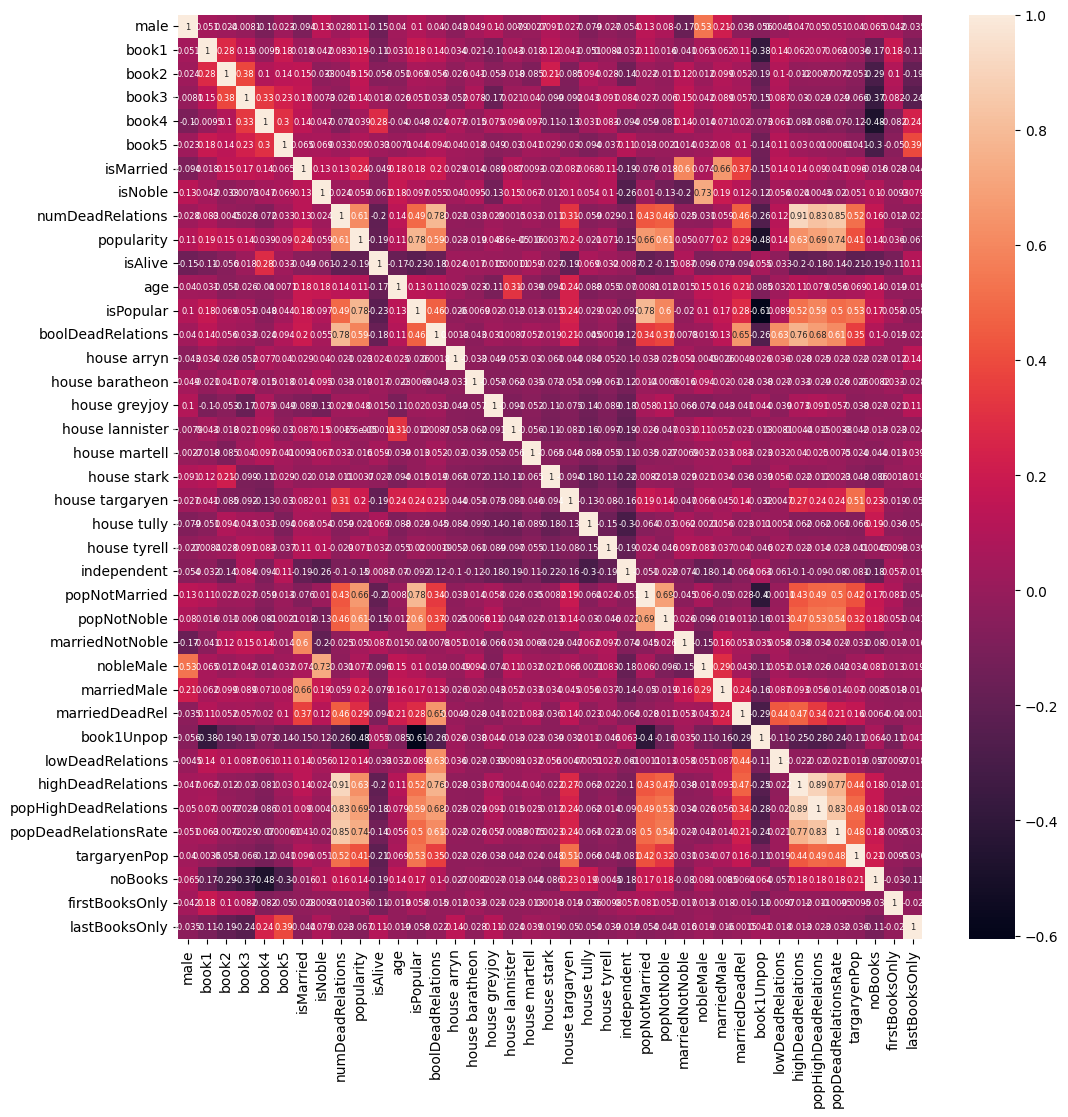

In [351]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded_new.corr(), annot=True, annot_kws={'size': 6})
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [352]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [353]:
# X = df_encoded.drop(columns=["isAlive"])
# y = df_encoded.isAlive
X = df_encoded_new.drop(columns=["isAlive"])
y = df_encoded_new.isAlive

In [354]:
# subset1 = df_encoded_new[df_encoded_new.isAlive == 0].reset_index(drop=True)
# subset2 = df_encoded_new[df_encoded_new.isAlive == 1].sample(len(subset1)).reset_index(drop=True)
# df_downsampled = pd.concat((subset1, subset2)).reset_index(drop=True)

# X = df_downsampled.drop(columns=["isAlive"])
# y = df_downsampled.isAlive
# X

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, shuffle=True, test_size=0.2)

In [357]:
# Обучим классификаторы и выберем лучший
classifier_grid = {
    "LogisticRegression": (
        LogisticRegression(),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(random_state=1),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
        }
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [None, 10, 20],
            'classifier__criterion': ['gini', 'entropy']
        }
    ),
}

scoring = 'accuracy'
# scoring = 'roc_auc'

results = {}
for name, (classifier, params) in classifier_grid.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    print(f"Обучаю {name}...")
    grid_search = GridSearchCV(
        estimator=pipe, param_grid=params, scoring=scoring, cv=9, n_jobs=2
    )
    grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        scoring: accuracy
    }
    print(results[name])
sorted_results = sorted(results.items(), key=lambda x: x[1][scoring], reverse=True)

best_model, best_info = sorted_results[0]
best_accuracy = best_info[scoring]

print(f"\nЛучшая модель: {best_model}. {scoring.title()}: {best_accuracy:.4f}")

print(f"\nМодели, отсортированные по {scoring.title()}:")
for name, info in sorted_results:
    print(f"{name}: {scoring.title()} = {info[scoring]:.4f}")

Обучаю LogisticRegression...
{'best_params': {'classifier__C': 0.1, 'classifier__penalty': 'l2'}, 'accuracy': 0.8141025641025641}
Обучаю AdaBoostClassifier...
{'best_params': {'classifier__learning_rate': 1, 'classifier__n_estimators': 200}, 'accuracy': 0.8044871794871795}
Обучаю RandomForestClassifier...
{'best_params': {'classifier__max_depth': 10, 'classifier__n_estimators': 200}, 'accuracy': 0.8365384615384616}
Обучаю GaussianProcessClassifier...
{'best_params': {}, 'accuracy': 0.8141025641025641}
Обучаю GaussianNB...
{'best_params': {}, 'accuracy': 0.8237179487179487}
Обучаю KNeighborsClassifier...
{'best_params': {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}, 'accuracy': 0.8493589743589743}
Обучаю SVC...
{'best_params': {'classifier__C': 1, 'classifier__kernel': 'rbf'}, 'accuracy': 0.8141025641025641}
Обучаю DecisionTreeClassifier...
{'best_params': {'classifier__criterion': 'entropy', 'classifier__max_depth': 10}, 'accuracy': 0.7724358974358975}

Лучшая модель

##### Feature engineering и визуализация новых признаков

In [49]:
subset1 = df_imputed[df_imputed.isAlive == 0].reset_index(drop=True)
subset2 = df_imputed[df_imputed.isAlive == 1].sample(len(subset1)).reset_index(drop=True)
df_downsampled = pd.concat((subset1, subset2)).reset_index(drop=True)

In [50]:
df_imputed_new = df_imputed.copy()
df_imputed_new['popNotMarried'] = df_imputed_new.isPopular & (df_imputed_new.isMarried == False)
df_imputed_new['popNotNoble'] = df_imputed_new.isPopular & (df_imputed_new.isNoble == False)
df_imputed_new['marriedNotNoble'] = df_imputed_new.isMarried & (df_imputed_new.isNoble == False)
df_imputed_new['nobleMale'] = df_imputed_new.male & df_imputed_new.isNoble
df_imputed_new['marriedMale'] = df_imputed_new.isMarried & df_imputed_new.male
df_imputed_new['marriedDeadRel'] = df_imputed_new.isMarried & df_imputed_new.boolDeadRelations

df_imputed_new['lowDeadRelations'] = (df_imputed_new.numDeadRelations >= 1) & (df_imputed_new.numDeadRelations < 3)
df_imputed_new['highDeadRelations'] = (df_imputed_new.numDeadRelations >= 3)
df_imputed_new['popDeadRelationsRate'] = (df_imputed_new.numDeadRelations * df_imputed_new.popularity)
df_imputed_new['targaryenPop'] = ((df_imputed_new.isPopular) & (df_imputed_new.great_house == 'house targaryen')).astype(int)

df_imputed_new['book1Unpop'] = df_imputed_new.book1 & df_imputed_new.isPopular == False

df_imputed_new['firstBooksOnly'] = df_imputed_new['book1'] & df_imputed_new['book2'] & (df_imputed_new['book3'] == True) & (df_imputed_new['book4'] == False) & (df_imputed_new['book5'] == False)
df_imputed_new['lastBooksOnly'] = (df_imputed_new['book1'] == False) & (df_imputed_new['book2'] == False) & (df_imputed_new['book3'] == False) & df_imputed_new['book4'] & df_imputed_new['book5']

df_imputed_new['allBooks'] = df_imputed_new['book1'] & df_imputed_new['book2'] & df_imputed_new['book3'] & df_imputed_new['book4'] & df_imputed_new['book5']
df_imputed_new['noBooks'] = (df_imputed_new[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1) == 0).astype(int)

df_imputed_new

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,marriedDeadRel,lowDeadRelations,highDeadRelations,popDeadRelationsRate,targaryenPop,book1Unpop,firstBooksOnly,lastBooksOnly,allBooks,noBooks
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,11,0.605351,...,0,False,True,6.658863,1,True,False,False,0,1
2,1,1,1,1,1,1,1,1,1,0.896321,...,1,True,False,0.896321,0,False,False,False,1,0
3,1,0,0,0,1,0,0,1,0,0.267559,...,0,False,False,0.000000,0,True,False,False,0,0
4,0,0,0,0,0,0,1,1,0,0.183946,...,0,False,False,0.000000,0,True,False,False,0,1
5,0,0,0,0,1,0,1,1,0,0.043478,...,0,False,False,0.000000,0,True,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,0,0.160535,...,0,False,False,0.000000,0,True,False,False,0,0
1554,0,1,1,0,0,0,0,0,0,0.040134,...,0,False,False,0.000000,0,True,False,False,0,0
1555,1,0,1,1,1,1,0,0,0,0.076923,...,0,False,False,0.000000,0,True,False,False,0,0


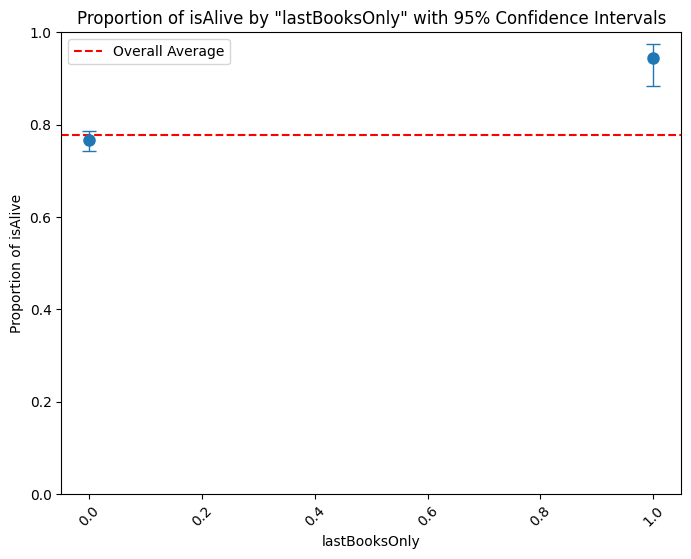

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def wilson_score_interval(successes, n, confidence=0.95):
    """Calculates the Wilson score interval for a binomial proportion."""
    if n == 0:
        return (0, 0)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    p_hat = successes / n
    denominator = 1 + z**2 / n
    center = (p_hat + z**2 / (2 * n)) / denominator
    radius = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4 * n)) / n) / denominator
    lower_bound = center - radius
    upper_bound = center + radius
    return (lower_bound, upper_bound)

feature = 'lastBooksOnly'

# Group by category and calculate the proportion of 'isAlive'
grouped = df_imputed_new.groupby(feature)['isAlive'].agg(['sum', 'count']).reset_index()
grouped.columns = [feature, 'Successes', 'Total']
grouped['Proportion'] = grouped['Successes'] / grouped['Total']

# Calculate the confidence intervals
grouped['CI_lower'], grouped['CI_upper'] = zip(*grouped.apply(
    lambda row: wilson_score_interval(row['Successes'], row['Total']), axis=1
))

# Calculate the overall average
overall_average = df['isAlive'].mean()

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
plt.errorbar(x=grouped[feature],
             y=grouped['Proportion'],
             yerr=[grouped['Proportion'] - grouped['CI_lower'], grouped['CI_upper'] - grouped['Proportion']],
             fmt='o',
             capsize=5,
             linewidth=1,
             markersize=8)

# Add the horizontal line for the average
plt.axhline(y=overall_average, color='r', linestyle='--', label='Overall Average')

plt.xlabel(feature)
plt.ylabel('Proportion of isAlive')
plt.title(f'Proportion of isAlive by "{feature}" with 95% Confidence Intervals')
plt.ylim(0, 1)
plt.legend() # Show the label for the average line
plt.xticks(rotation=45)
plt.show()

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8012820512820513

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

In [273]:
df_test = pd.read_csv(DATA_DIR/"game_of_thrones_test.csv", index_col="S.No")
print(len(df_test))
df_test.head()

389


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


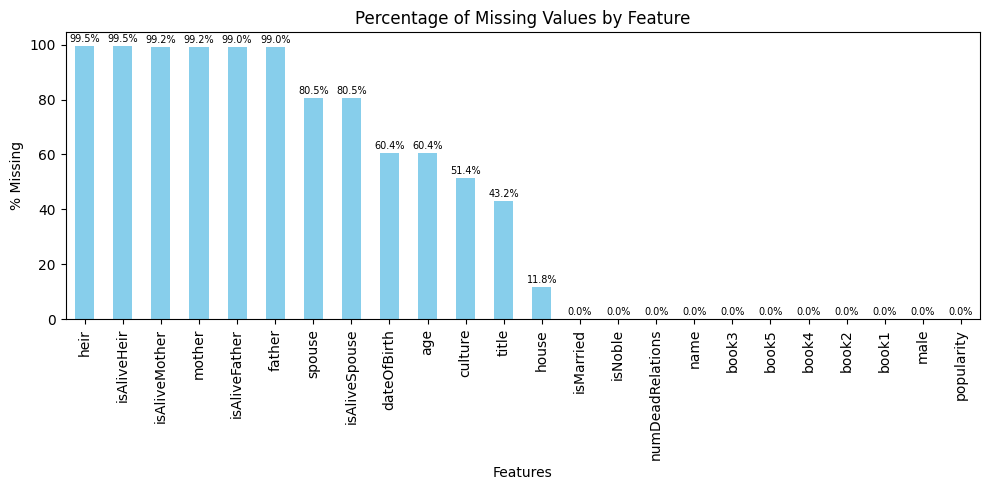

In [274]:
THRESHOLD = 70

missing_value_df = plot_missing_cols(df_test)
cols_to_drop = missing_value_df[missing_value_df.percent_missing > THRESHOLD].index.tolist()
cols_to_drop += ['dateOfBirth', 'name', 'title']
df_test_no_empty_cols = df_test.drop(columns=cols_to_drop)

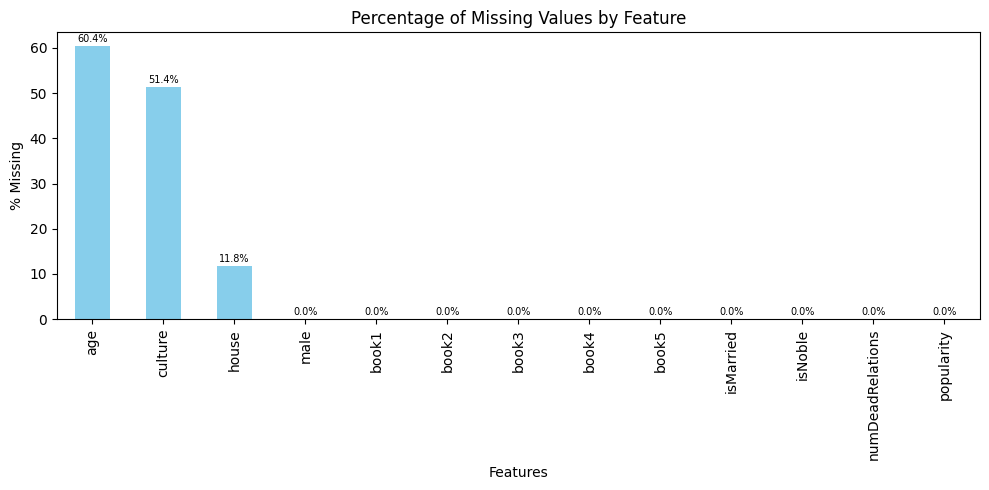

In [216]:
_ = plot_missing_cols(df_test_no_empty_cols)

In [217]:
df_test_cult_simplified = df_test_no_empty_cols.copy()

df_test_cult_simplified['culture'] = df_test_cult_simplified.culture.str.lower().apply(lambda cult_name: cult_mapping.get(cult_name, cult_name))

In [218]:
# Персонажи Free Folk не имеют признака House по намерению автора,
# а не случайным образом, поэтому мы можем заполнить пропуски,
# присвоив им категорию independent
mask = (df_test_cult_simplified.culture == 'free folk') & (df_test_cult_simplified.house.isna())
df_test_cult_simplified.loc[mask, 'house'] = 'Independent'
df_test_cult_simplified[df_test_cult_simplified.culture == 'free folk']

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,
1566,0,free folk,Independent,0,0,1,1,1,0,0,6.0,0,0.076923
1584,1,free folk,House Stark,1,1,1,1,1,0,0,NaN,0,0.250836
1614,1,free folk,Thenn,0,0,1,1,1,0,1,NaN,0,0.140468
1624,1,free folk,Independent,0,0,0,0,0,0,0,NaN,0,0.000000
1645,1,free folk,Independent,0,0,0,0,0,0,1,NaN,0,0.000000
1665,0,free folk,House Stark,1,1,1,1,1,0,1,NaN,0,0.090301
1731,1,free folk,Independent,0,0,0,0,1,0,0,17.0,0,0.056856
1764,1,free folk,Independent,0,0,0,0,0,0,0,NaN,0,0.709030
1790,1,free folk,Independent,0,0,1,0,1,0,0,NaN,0,0.227425


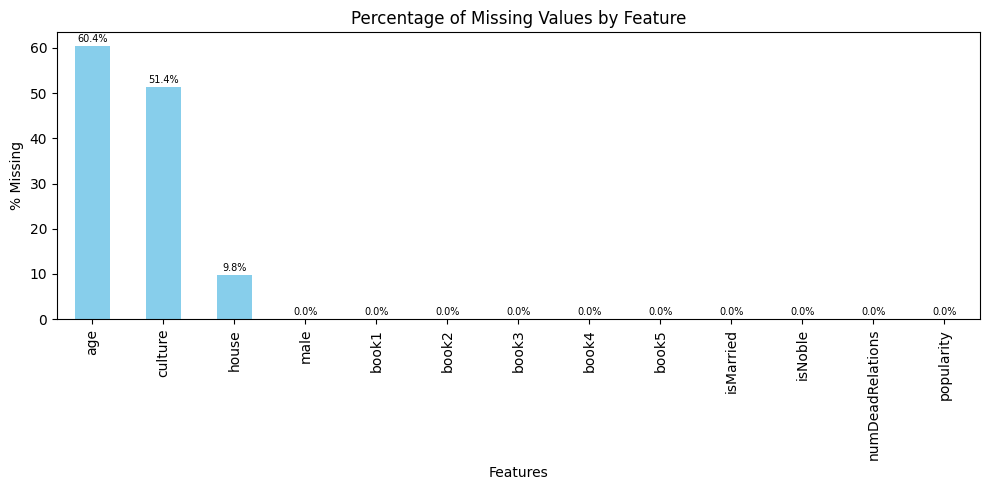

In [220]:
_ = plot_missing_cols(df_test_cult_simplified)

In [221]:
df_test_new_greathouse = df_test_cult_simplified.copy()

df_test_new_greathouse['great_house'] = df_test_new_greathouse.house.str.lower().apply(lambda house_name: house.get(house_name, np.nan))
df_test_new_greathouse.great_house.value_counts()

,count
great_house,
independent,70
house stark,50
house targaryen,38
house tully,31
house lannister,28
house martell,26
house tyrell,24
house greyjoy,21
house baratheon,16


In [222]:
mask = (df_test_new_greathouse.great_house.isna() == False) & (df_test_new_greathouse.culture.isna() == False)
df_greathouse_cult_nona = df_test_new_greathouse[mask]
msg = "Количество объектов с заполненными признаками great_house и culture:"
print(msg, len(df_greathouse_cult_nona))
print("Эти объекты обладают информацией, подходящей для заполнения пропусков в great_house.")

Количество объектов с заполненными признаками great_house и culture: 159
Эти объекты обладают информацией, подходящей для заполнения пропусков в great_house.


In [ ]:
Index(['male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'popularity',
       'great_house'],
      dtype='object')

In [229]:
mask = (df_test_new_greathouse.great_house.isna() == True) & \
       (df_test_new_greathouse.culture.isna() == False) & \
       (df_test_new_greathouse.culture.isin(known_categories)) # выбираем только известные классификатору категории

df_greathouse_nan = df_test_new_greathouse[mask].drop(columns=['house', 'age'])
df_greathouse_nan.columns

# Снова удаляем ненужные признаки и кодируем признак culture
dummies = enc.transform(df_greathouse_nan.culture.to_frame())
culture_encoded = pd.DataFrame(dummies.toarray().astype(int), columns=enc.categories_[0])
df_greathouse_nan_encoded = df_greathouse_nan.copy().reset_index(drop=True)
df_greathouse_nan_encoded = pd.concat((df_greathouse_nan_encoded, culture_encoded), axis=1)
df_greathouse_nan_encoded

# # Заполним предсказаниями часть пропусков признака great_house
# # в исходном наборе данных
df_test_new_greathouse_imputed = df_test_new_greathouse.copy().drop(columns=['house'])
y_pred = pipe.predict(df_greathouse_nan_encoded)
pred_class_to_names = class_names.Class.loc[y_pred].to_numpy()
df_test_new_greathouse_imputed.loc[df_test_new_greathouse[mask].index, "great_house"] = pred_class_to_names
df_test_new_greathouse_imputed.great_house.value_counts()
df_test_new_greathouse_imputed

NotFittedError: Pipeline is not fitted yet.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [52]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 13.2MB/s]


In [53]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)